In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
days = 7
hours_per_day = 24
total_rows = days * hours_per_day

# Generate synthetic data
time = pd.date_range(start='2025-08-01', periods=total_rows, freq='h')
solar = np.clip(np.random.normal(loc=0.8, scale=0.3, size=total_rows), 0, 1.5)
battery = np.clip(np.cumsum(solar - np.random.uniform(0.5, 1.0, size=total_rows)), 0, 10)
grid = np.clip(np.random.uniform(0.2, 2.0, size=total_rows), 0, 3.0)
comfort = np.random.randint(2, 6, size=total_rows)
reward = comfort + np.random.normal(loc=1.0, scale=0.5, size=total_rows)
appliances = np.random.randint(0, 2, size=(total_rows, 5))  # 5 appliances

# Create DataFrame
df = pd.DataFrame({
    'Time': time,
    'Solar (kWh)': solar,
    'Battery Level (kWh)': battery,
    'Grid Usage (kWh)': grid,
    'Comfort Score': comfort,
    'Reward': reward
})

# Add appliance usage
for i in range(5):
    df[f'Appliance_{i+1}'] = appliances[:, i]

# Save to Excel
excel_path = 'synthetic_energy_data.xlsx'
df.to_excel(excel_path, index=False)

print(f"Excel generated: {excel_path}")

Excel generated: synthetic_energy_data.xlsx


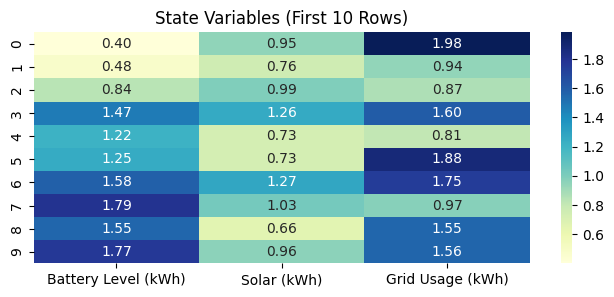

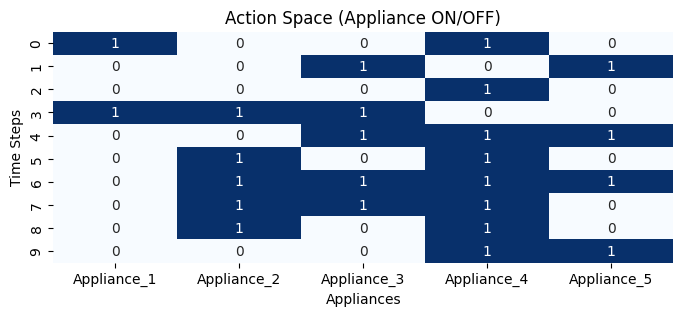

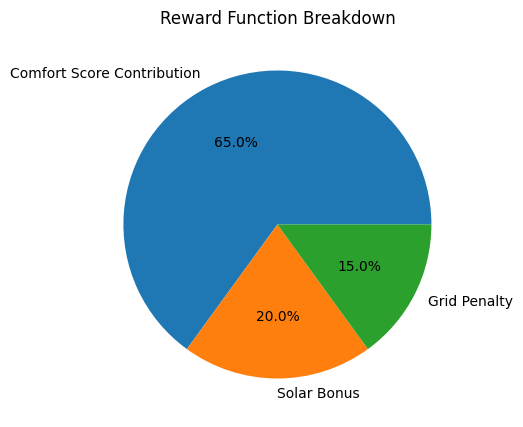

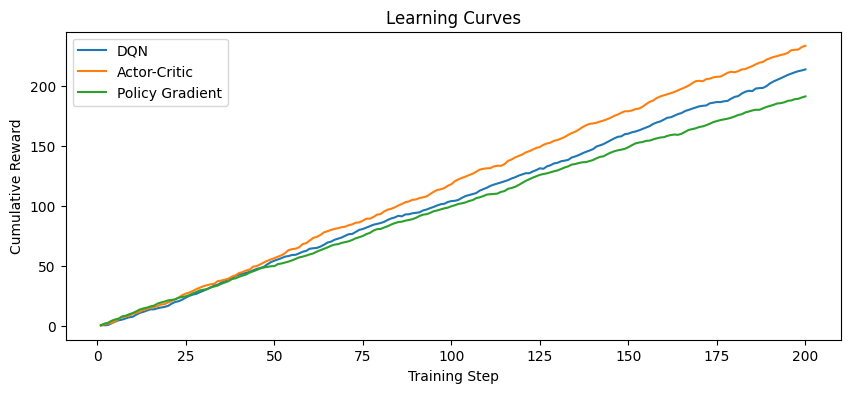

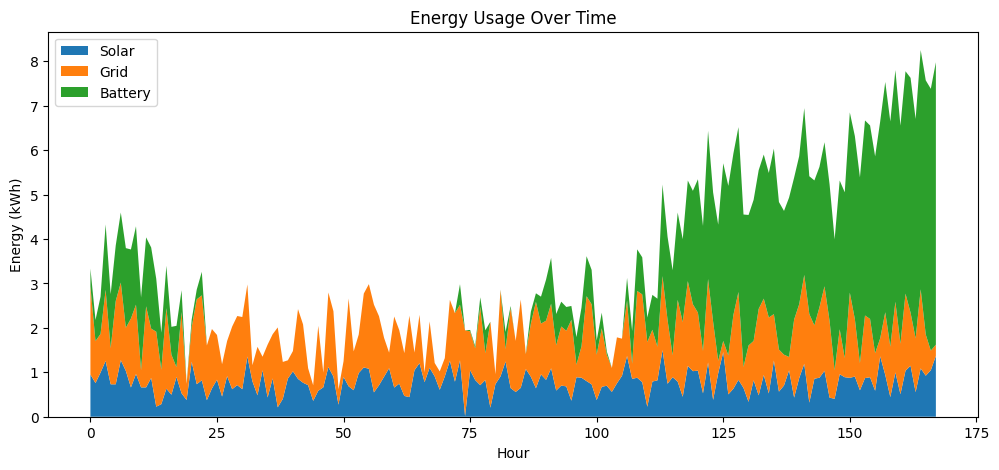

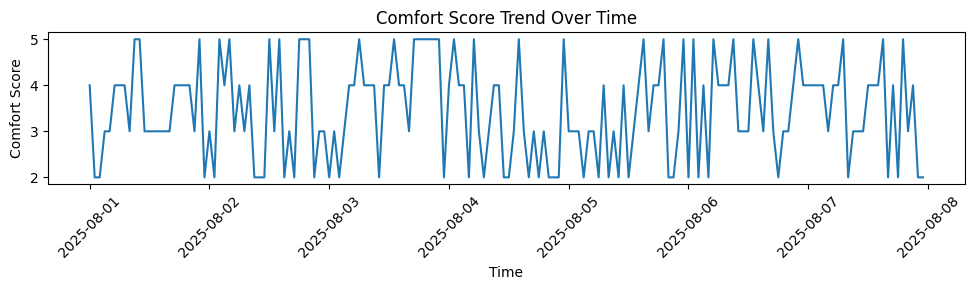

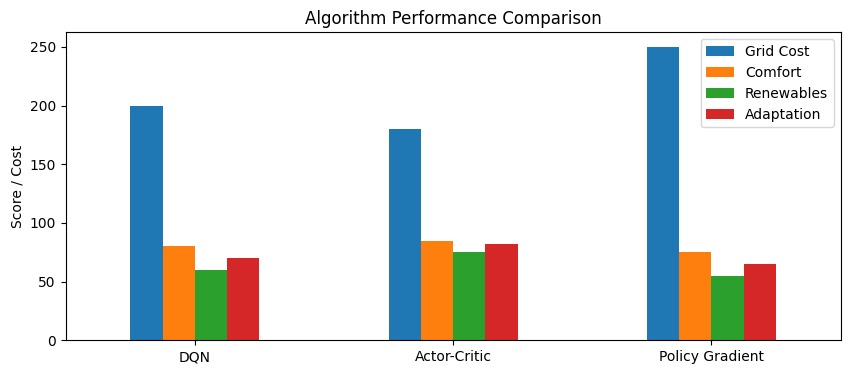

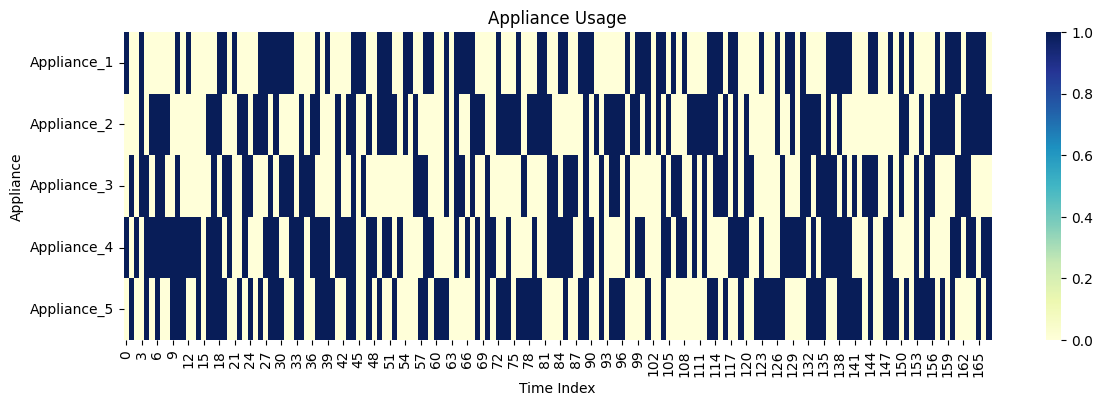

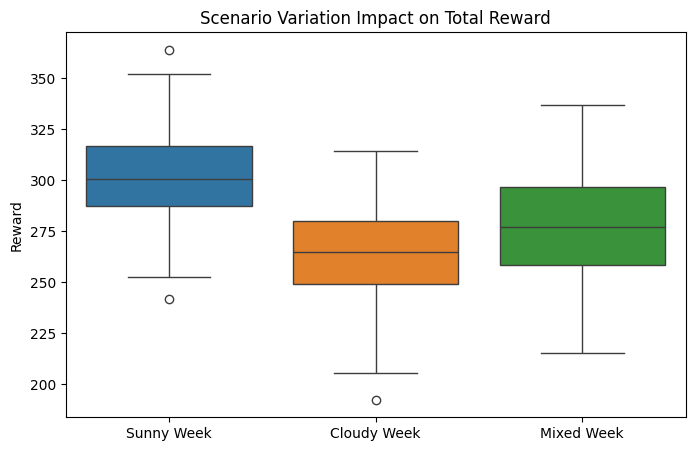

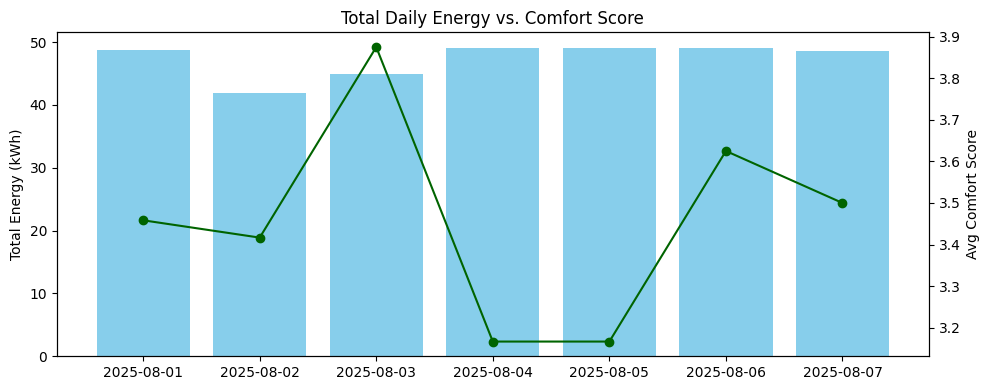

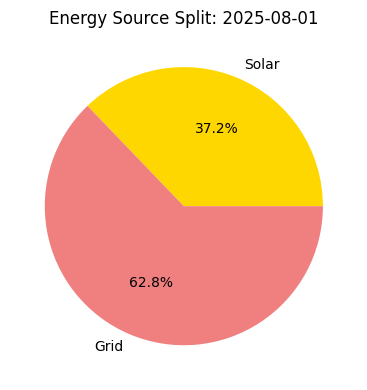

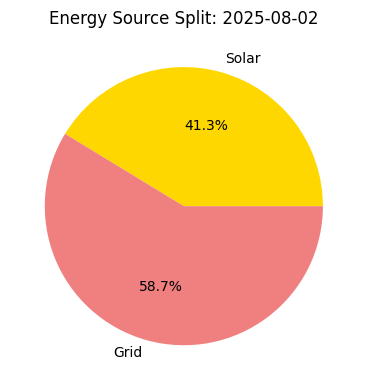

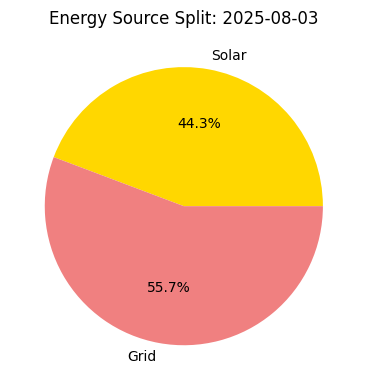

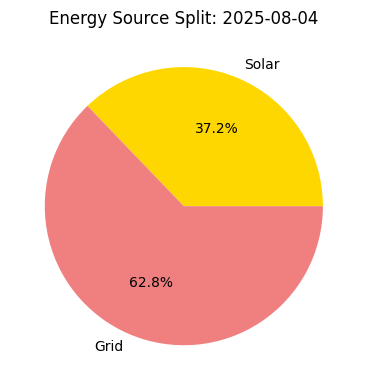

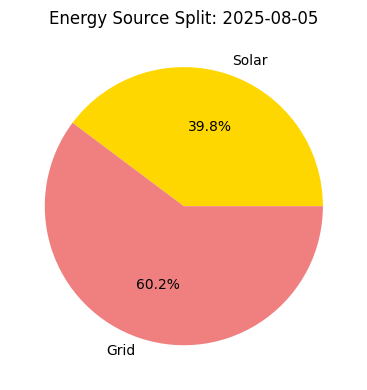

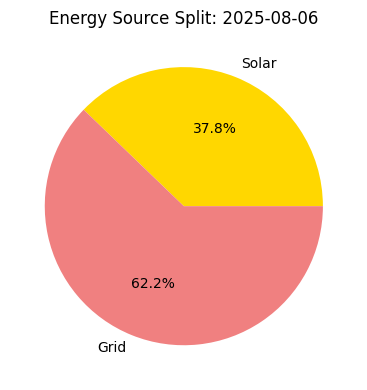

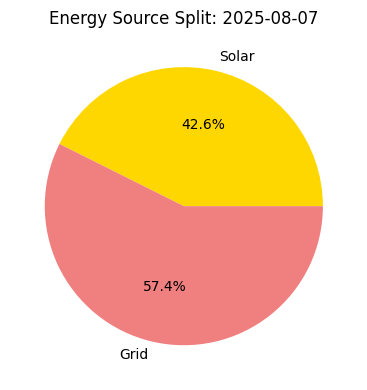

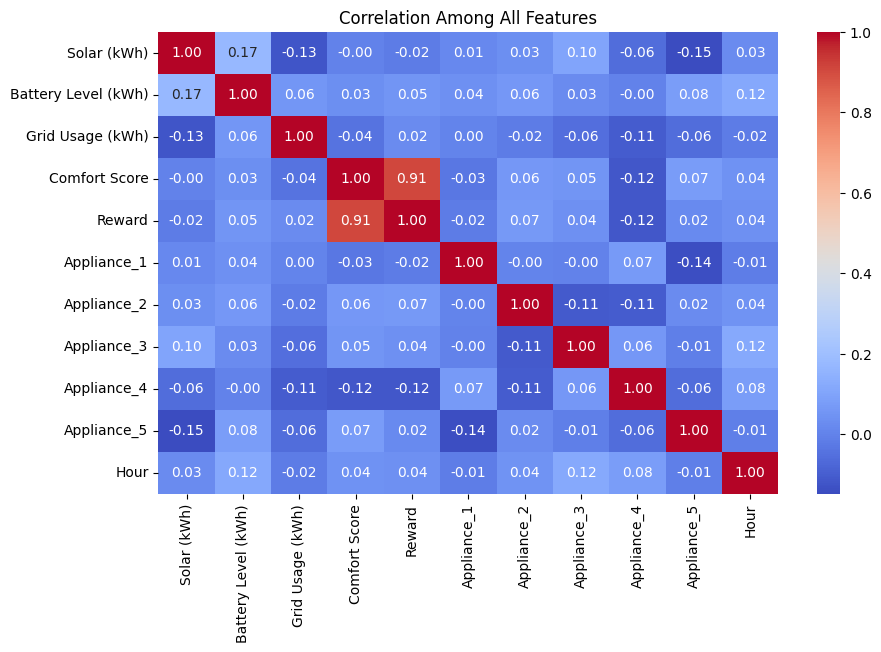

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Excel data
df = pd.read_excel("synthetic_energy_data.xlsx")
solar_profile = df['Solar (kWh)'].values

# Creating helper columns
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Day'] = pd.to_datetime(df['Time']).dt.date
appliance_cols = [col for col in df.columns if 'Appliance_' in col]

# State Space Heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(df[['Battery Level (kWh)', 'Solar (kWh)', 'Grid Usage (kWh)']].head(10), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("State Variables (First 10 Rows)")
plt.savefig("state_space_heatmap.png")
plt.show()

# Action Space Heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(df[appliance_cols].head(10), annot=True, cbar=False, cmap='Blues')
plt.title("Action Space (Appliance ON/OFF)")
plt.xlabel("Appliances")
plt.ylabel("Time Steps")
plt.savefig("action_space_heatmap.png")
plt.show()

# Reward Function Breakdown
plt.figure(figsize=(5, 5))
labels = ['Comfort Score Contribution', 'Solar Bonus', 'Grid Penalty']
sizes = [65, 20, 15]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Reward Function Breakdown")
plt.savefig("reward_pie_chart.png")
plt.show()

# Algorithm Learning Curves - Simulated
timesteps = np.arange(1, 201)
rewards_dqn = np.cumsum(np.random.normal(1, 0.5, 200))
rewards_ac = np.cumsum(np.random.normal(1.2, 0.6, 200))
rewards_pg = np.cumsum(np.random.normal(0.9, 0.4, 200))

plt.figure(figsize=(10, 4))
plt.plot(timesteps, rewards_dqn, label='DQN')
plt.plot(timesteps, rewards_ac, label='Actor-Critic')
plt.plot(timesteps, rewards_pg, label='Policy Gradient')
plt.xlabel("Training Step")
plt.ylabel("Cumulative Reward")
plt.title("Learning Curves")
plt.legend()
plt.savefig("learning_curves.png")
plt.show()

# Energy Usage Over Time
plt.figure(figsize=(12, 5))
plt.stackplot(df.index, df['Solar (kWh)'], df['Grid Usage (kWh)'], df['Battery Level (kWh)'],
              labels=['Solar', 'Grid', 'Battery'])
plt.legend(loc='upper left')
plt.title("Energy Usage Over Time")
plt.xlabel("Hour")
plt.ylabel("Energy (kWh)")
plt.savefig("energy_usage_over_time.png")
plt.show()

# Comfort Score Trend
plt.figure(figsize=(10, 3))
sns.lineplot(x='Time', y='Comfort Score', data=df)
plt.title("Comfort Score Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("comfort_score_trend.png")
plt.show()

# Model Performance Comparison
algos = ['DQN', 'Actor-Critic', 'Policy Gradient']
metrics = ['Grid Cost', 'Comfort', 'Renewables', 'Adaptation']
values = np.array([
    [200, 80, 60, 70],
    [180, 85, 75, 82],
    [250, 75, 55, 65]
])

df_bar = pd.DataFrame(values, index=algos, columns=metrics)
df_bar.plot(kind='bar', figsize=(10, 4))
plt.title("Algorithm Performance Comparison")
plt.ylabel("Score / Cost")
plt.xticks(rotation=0)
plt.savefig("algorithm_comparison.png")
plt.show()

# Appliance Schedule Heatmap
appliance_matrix = df[appliance_cols].T
plt.figure(figsize=(14, 4))
sns.heatmap(appliance_matrix, cmap="YlGnBu", cbar=True)
plt.title("Appliance Usage")
plt.xlabel("Time Index")
plt.ylabel("Appliance")
plt.savefig("appliance_heatmap.png")
plt.show()

# Scenario Variation Impact
scenario_1 = np.random.normal(300, 20, 100)
scenario_2 = np.random.normal(260, 25, 100)
scenario_3 = np.random.normal(280, 30, 100)

df_var = pd.DataFrame({
    'Sunny Week': scenario_1,
    'Cloudy Week': scenario_2,
    'Mixed Week': scenario_3
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_var)
plt.title("Scenario Variation Impact on Total Reward")
plt.ylabel("Reward")
plt.savefig("scenario_impact.png")
plt.show()

# Daily Energy vs Comfort
daily = df.groupby('Day').agg({
    'Solar (kWh)': 'sum',
    'Grid Usage (kWh)': 'sum',
    'Battery Level (kWh)': 'mean',
    'Comfort Score': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.bar(daily['Day'], daily['Solar (kWh)'] + daily['Grid Usage (kWh)'],
        label='Total Energy', color='skyblue')
ax2 = ax1.twinx()
ax2.plot(daily['Day'], daily['Comfort Score'], label='Avg Comfort', color='darkgreen', marker='o')
ax1.set_ylabel("Total Energy (kWh)")
ax2.set_ylabel("Avg Comfort Score")
ax1.set_title("Total Daily Energy vs. Comfort Score")
fig.tight_layout()
plt.savefig("daily_energy_vs_comfort.png")
plt.show()

# Solar vs Grid Energy per Day
for d in daily['Day']:
    day_df = df[df['Day'] == d]
    solar_total = day_df['Solar (kWh)'].sum()
    grid_total = day_df['Grid Usage (kWh)'].sum()
    plt.figure(figsize=(4, 4))
    plt.pie([solar_total, grid_total],
            labels=['Solar', 'Grid'],
            autopct='%1.1f%%', colors=['gold', 'lightcoral'])
    plt.title(f"Energy Source Split: {d}")
    plt.tight_layout()
    plt.savefig(f"energy_split_{d}.png")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.drop(columns=['Time', 'Day']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Among All Features")
plt.savefig("correlation_heatmap.png")
plt.show()

# Smart Home Environment

In [4]:
# Checking Solar_Profile
print(solar_profile[:24])

[0.94901425 0.75852071 0.99430656 1.25690896 0.72975399 0.72975891
 1.27376384 1.03023042 0.65915768 0.96276801 0.66097469 0.66028107
 0.87258868 0.22601593 0.28252465 0.63131374 0.49615066 0.8942742
 0.52759278 0.37630889 1.23969463 0.73226711 0.82025846 0.37257554]


Streaming output truncated to the last 5000 lines.
Hour 0, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 0, Grid Use: 0.10
Hour 1, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 1, Grid Use: 0.10
Hour 2, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 2, Grid Use: 0.10
Hour 3, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 3, Grid Use: 0.10
Hour 4, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 4, Grid Use: 0.10
Hour 5, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 5, Grid Use: 0.10
Hour 6, Appliance Demand: 0.10, Solar: 0.30
Hour 7, Appliance Demand: 1.60, Solar: 0.30
[GRID USED] Hour 7, Grid Use: 1.10
Hour 8, Appliance Demand: 1.60, Solar: 0.30
[GRID USED] Hour 8, Grid Use: 1.30
Hour 9, Appliance Demand: 0.10, Solar: 0.30
Hour 10, Appliance Demand: 0.90, Solar: 0.30
[GRID USED] Hour 10, Grid Use: 0.40
Hour 11, Appliance Demand: 0.10, Solar: 0.30
Hour 12, Appliance Demand: 0.10, Solar: 0.30
Hour 13, Appliance Demand: 0.10, Solar: 0.30
Hour 14, Appl

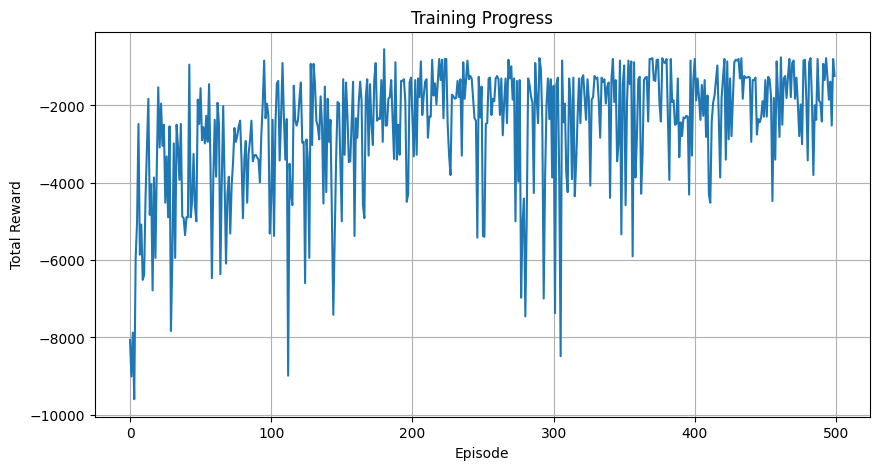

Hour 0, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 0, Grid Use: 0.10
Hour 1, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 1, Grid Use: 0.10
Hour 2, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 2, Grid Use: 0.10
Hour 3, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 3, Grid Use: 0.10
Hour 4, Appliance Demand: 0.10, Solar: 0.00
[GRID USED] Hour 4, Grid Use: 0.10
Hour 5, Appliance Demand: 1.60, Solar: 0.00
[GRID USED] Hour 5, Grid Use: 1.60
Hour 6, Appliance Demand: 0.10, Solar: 0.30
Hour 7, Appliance Demand: 1.60, Solar: 0.30
[GRID USED] Hour 7, Grid Use: 1.10
Hour 8, Appliance Demand: 2.40, Solar: 0.30
[GRID USED] Hour 8, Grid Use: 2.10
Hour 9, Appliance Demand: 0.90, Solar: 0.30
[GRID USED] Hour 9, Grid Use: 0.60
Hour 10, Appliance Demand: 0.10, Solar: 0.30
Hour 11, Appliance Demand: 0.10, Solar: 0.30
Hour 12, Appliance Demand: 0.10, Solar: 0.30
Hour 13, Appliance Demand: 0.10, Solar: 0.30
Hour 14, Appliance Demand: 0.10, Solar: 0.30
Hour 15, Appliance D

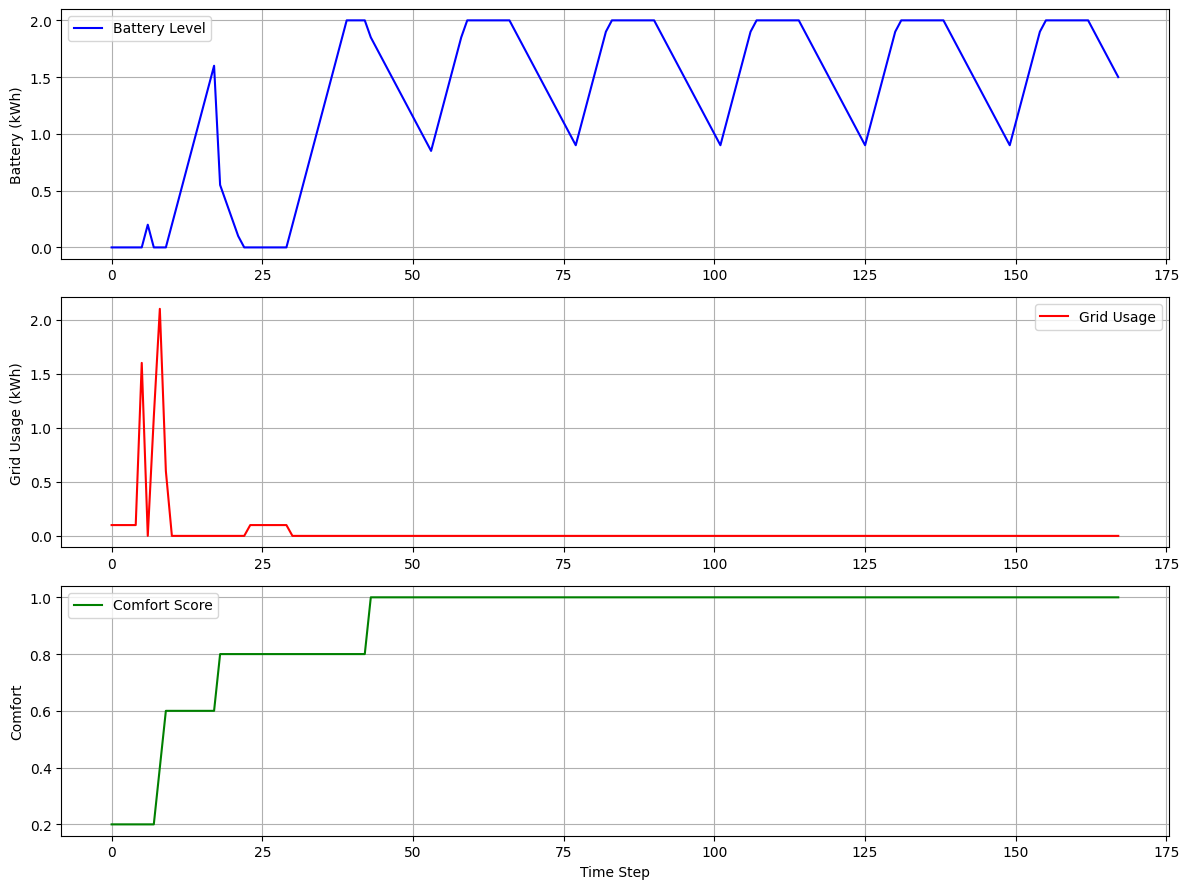

In [6]:
import random

# Low solar profile to force grid usage
solar_profile = [0.0 if h < 6 or h > 18 else 0.3 for h in range(24)] * 7  # 168 hours

# Smart Home Environmen
class SmartHomeEnv:
    def __init__(self, battery_capacity=2):
        self.hours = 168
        self.time = 0
        self.battery_capacity = battery_capacity
        self.battery_level = 0
        self.grid_cost = 0.15
        self.comfort_weight = 5.0
        self.penalty_unfinished = 20.0
        self.solar_profile = solar_profile

        self.appliances = [
            {"name": "Appliance_1", "power": 0.8, "duration": 2, "deadline": (8, 20), "progress": 0},
            {"name": "Appliance_2", "power": 1.2, "duration": 1, "deadline": (18, 22), "progress": 0},
            {"name": "Appliance_3", "power": 0.1, "duration": "continuous", "deadline": None, "progress": 1},
            {"name": "Appliance_4", "power": 0.05, "duration": 5, "deadline": (18, 23), "progress": 0},
            {"name": "Appliance_5", "power": 1.5, "duration": 3, "deadline": (5, 9), "progress": 0}
        ]

    def reset(self):
        self.time = 0
        self.battery_level = 0
        for app in self.appliances:
            app['progress'] = 1 if app['duration'] == 'continuous' else 0
        return self._get_state()

    def _get_state(self):
        hour = self.time % 24
        solar = self.solar_profile[self.time % len(self.solar_profile)]
        tasks_left = [app['progress'] for app in self.appliances]
        return np.array([hour, solar, self.battery_level] + tasks_left, dtype=np.float32)

    def step(self, action):
        hour = self.time % 24
        solar = self.solar_profile[self.time % len(self.solar_profile)]
        appliance_demand = 0.0
        comfort_met = []

        for i, app in enumerate(self.appliances):
            if app['duration'] == "continuous":
                appliance_demand += app['power']
                comfort_met.append(1)
            else:
                start, end = app['deadline']
                if start <= hour < end:
                    if action[i] == 1 and app['progress'] < app['duration']:
                        appliance_demand += app['power']
                        app['progress'] += 1
                comfort_met.append(1 if app['progress'] >= app['duration'] else 0)
        print(f"Hour {hour}, Appliance Demand: {appliance_demand:.2f}, Solar: {solar:.2f}")

        net_demand = appliance_demand - solar
        grid_use = 0

        if net_demand > 0:
            if self.battery_level >= net_demand:
                self.battery_level -= net_demand
            else:
                grid_use = net_demand - self.battery_level
                self.battery_level = 0
        else:
            battery_charge = min(-net_demand, self.battery_capacity - self.battery_level)
            self.battery_level += battery_charge

        if grid_use > 0:
            print(f"[GRID USED] Hour {hour}, Grid Use: {grid_use:.2f}")
        comfort_score = sum(comfort_met) / len(comfort_met)
        unfinished = sum(1 for app in self.appliances if isinstance(app['duration'], int) and app['progress'] < app['duration'])
        reward = -(grid_use * self.grid_cost) + (self.comfort_weight * comfort_score) - self.penalty_unfinished * unfinished
        self.time += 1
        done = self.time >= self.hours
        return self._get_state(), reward, done, {"grid_use": grid_use, "comfort": comfort_score}


# Q-Learning Agent

class QLearningAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.2):
        self.q_table = {}
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def get_state_key(self, state):
        return tuple(np.round(state, 1))

    def choose_action(self, state):
        state_key = self.get_state_key(state)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)
        if random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)
        return np.argmax(self.q_table[state_key])

    def learn(self, state, action, reward, next_state):
        state_key = self.get_state_key(state)
        next_key = self.get_state_key(next_state)

        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)
        if next_key not in self.q_table:
            self.q_table[next_key] = np.zeros(self.n_actions)

        predict = self.q_table[state_key][action]
        target = reward + self.gamma * np.max(self.q_table[next_key])
        self.q_table[state_key][action] += self.alpha * (target - predict)


# Training Loop
env = SmartHomeEnv(battery_capacity=2)
agent = QLearningAgent(n_actions=32)
rewards = []
episodes = 500

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action_idx = agent.choose_action(state)
        action = [int(x) for x in format(action_idx, '05b')]
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action_idx, reward, next_state)
        state = next_state
        total_reward += reward
    rewards.append(total_reward)
    if episode % 50 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward:.2f}")

# Plot training reward
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.grid(True)
plt.show()

# Post-training Analysis
state = env.reset()
battery_levels = []
grid_usages = []
comforts = []
done = False

while not done:
    action_idx = agent.choose_action(state)
    action = [int(x) for x in format(action_idx, '05b')]
    next_state, reward, done, info = env.step(action)
    battery_levels.append(env.battery_level)
    grid_usages.append(info['grid_use'])
    comforts.append(info['comfort'])
    state = next_state

# Final status
print("\nFinal Appliance Status After Training")
for app in env.appliances:
    if app['duration'] == 'continuous':
        print(f"{app['name']}: Continuous appliance (always running)")
    else:
        status = "Completed" if app['progress'] >= app['duration'] else "Incomplete"
        print(f"{app['name']}: {status} ({app['progress']} of {app['duration']} hours)")


# Visuals

# Battery Level
time_axis = np.arange(len(battery_levels))
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(time_axis, battery_levels, label="Battery Level", color="blue")
plt.ylabel("Battery (kWh)")
plt.legend()
plt.grid(True)

# Grid Usage
plt.subplot(3, 1, 2)
plt.plot(time_axis, grid_usages, label="Grid Usage", color="red")
plt.ylabel("Grid Usage (kWh)")
plt.legend()
plt.grid(True)

# Comfort Score
plt.subplot(3, 1, 3)
plt.plot(time_axis, comforts, label="Comfort Score", color="green")
plt.xlabel("Time Step")
plt.ylabel("Comfort")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()